In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# facebookしゃのfasttextをパッケージ化したgensim
import gensim.models.fasttext as ft

In [5]:
#  htmlを分解していろいろ中身を取り出すためのパッケージ
from pyquery import PyQuery as pq
from pprint import pprint
# 正規表現を取り扱うパッケージ
import re

In [6]:
# 取り出し元のurl
url_o = "http://hayabusa.open2ch.net"
# 取り出し物のurlだけどスレッドが一覧になってるスレ一覧　サッカーch
url = "http://hayabusa.open2ch.net/livefoot/subback.html"
#url = "http://hayabusa.open2ch.net/livejupiter/subback.html"

In [7]:
# pyqueryを用いてスレイ知覧urlからhtmlを分解した状態で取得
dom = pq(url)

In [9]:
linked_urls = [(url_o + link.attr["href"])[:-3] for link in dom("a").items()]

In [30]:
import time

texts = ""
# 全部のスレッドにアクセスしてhtmlを拾ってきてからddタグが付いた要素だけを抽出して、
# その後に全部のレスを抜き出してtexts変数に突っ込むforループ
for i, link_url in enumerate(linked_urls):
    print(i)
    # 各スレッドのアドレスからhtmlを分解した状態で抽出と
    thread = pq(link_url)
    # dd要素を抽出
    each_thread_doms = thread.find("dd")
    # 各スレッドからレスを全部抽出するforループ
    for each_thread_dom in each_thread_doms:
        #print(str(pq(each_thread_dom)))
        # レスがまとまった非文字列になってるため、それを全部文字列に変換する
        strtype_each_thread_res = str(pq(each_thread_dom))
        # レスのみを抽出するために余分な部分を全部排除する
        # > >の文字そのもの
        # [\s\S] スペースや改行も含めたあらゆる文字列( . スペースや開業を含まない何にか文字 )
        # * 直前の文字の繰り返し（何回でもいい）
        # ? 直前の文字の繰り返しを最短マッチに限る
        # <ares <aresって文字列
        # >バックレ伝説を聞くけど間近で見たことはない<br/>\n<ares
        # >から始まって、その後に改行もスペースもありでなんかの文字列がずっと続いた後に、
        # <aresという文字列がやってくるパターンを最短マッチのものに限り抽出しろ
        res = re.search(">[\s\S]*?<ares", strtype_each_thread_res)
        # tryは例外処理って呼ばれる構文
        try:
            # 文字列textsにとりだした結果を格納
            # groupは正規表現の結果から取り出す関数 
            texts += res.group()[1:-5]
        except:
            print(str(pq(each_thread_dom)))
    # サーバに負荷かけないように1秒休む
    time.sleep(1)
    

0
1
2
3
4
5
6
<dd>
このスレッドは1000を超えました。<br/>もう書けないので、新しいスレッドを立ててくださいです。。。<br/>
※スレ主は1005まで投稿できるよ。次スレ誘導とかに使ってね
<br/><br/>
</dd>


7
8
9
10
11
12
13
14
15
16
17
18
19
20
<dd>
このスレッドは1000を超えました。<br/>もう書けないので、新しいスレッドを立ててくださいです。。。<br/>
※スレ主は1005まで投稿できるよ。次スレ誘導とかに使ってね
<br/><br/>
</dd>


21
22
<dd>
このスレッドは1000を超えました。<br/>もう書けないので、新しいスレッドを立ててくださいです。。。<br/>
※スレ主は1005まで投稿できるよ。次スレ誘導とかに使ってね
<br/><br/>
</dd>


23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
<dd>
このスレッドは1000を超えました。<br/>もう書けないので、新しいスレッドを立ててくださいです。。。<br/>
※スレ主は1005まで投稿できるよ。次スレ誘導とかに使ってね
<br/><br/>
</dd>


57
58
59
60
61
62
63
64
65
66
67
68
<dd>
このスレッドは1000を超えました。<br/>もう書けないので、新しいスレッドを立ててくださいです。。。<br/>
※スレ主は1005まで投稿できるよ。次スレ誘導とかに使ってね
<br/><br/>
</dd>


69
70
71
<dd>
このスレッドは1000を超えました。<br/>もう書けないので、新しいスレッドを立ててくださいです。。。<br/>
※スレ主は1005まで投稿できるよ。次スレ誘導とかに使ってね
<br/><br/>
</dd>


72
73
74
75
76
77
78
<dd>
このスレッドは1000を超えました。<br/>もう書けないので、新しいスレッドを立ててくださいです。。。<br/>
※スレ主は1005まで投稿できるよ。次スレ誘導とかに使ってね
<

In [31]:
# 不要なタグの残りを削除してる
output_text = pq(texts.replace("<br/>", "").replace("\n", "\\n"))

In [32]:
output_text = str(output_text.remove("div").remove("a").remove("br"))

In [33]:
# \nがpqとおすと消える恐れがあるので元に戻す
output_text = output_text.replace("\\n", "\n ")

In [62]:
# 整形しおわった本文抽出結果を保存
# encoding='UTF-8'をつけないと'cp932' codec can't encode characterというエラー
# https://ja.stackoverflow.com/questions/34431/python-%E3%82%A8%E3%83%A9%E3%83%BCcp932-codec-cant-encode-character
fw = open("./2chtext.txt", "w", encoding="utf-8")

In [63]:
fw.write(output_text + "\n")

2299694

In [64]:
fw.close()

In [65]:
# subprocess:Pythonからコマンドを実行するためのモジュール
import subprocess as sp
# mecabをよびだして単語ごとに分解する
# -o (実行file名)	実行ファイル名を指定
sp.call(["mecab", "./2chtext.txt", "-o", "./2chtextmecab.txt", "-Owakati"], shell=True)
#sp.call(["mecab", "2chtext.txt", "-o", "2chtextmecab.txt", "-Owakati"])
#tg = MeCab.Tagger("-Owakati", "-b", "81920000000000")

0

In [71]:
# mecabで分解してくれた単語ごとに区切ったファイルを読み込み
fr = open("./2chtextmecab.txt", "r", encoding="utf-8")

mecabed_txt = fr.read()
# 単語ごとに空白で区切られた文字列から単語ごとの文字列listを取得する
list_out_txt = mecabed_txt.split(" ")
# 単語ごとにどれぐらいの頻度で出てきたかを数え上げしてる
list_out_txt = pd.Series(list_out_txt).value_counts()

fw = open("2chtextmecab_vocab.txt", "w", encoding="utf-8")

# 低頻出な単語を省きたいのでそれをvalue_countの結果から弾いて捨てるforループ
for index, out_txt_word_frequency in zip(list_out_txt.index, list_out_txt):
    # 頻出回数が20以下の単語は消す
    if out_txt_word_frequency <= 20:
        mecabed_txt = mecabed_txt.replace(index, "")
    
fw.write(mecabed_txt)
fw.close()

In [4]:
#ここのセルでfasttextを用いて単語間の関係性を学習
from gensim.models.word2vec import LineSentence

# 学習用の食わせるデータを作成
input_file = LineSentence("./2chtextmecab.txt")
input_file_vocab = LineSentence("./2chtextmecab_vocab.txt")

# modelを作成
model = ft.FastText(min_count=1)
# vocabように作った低頻出単語削除済みのデータを使って辞書作成
model.build_vocab(input_file)
# 実際にtrainして単語関係を学習
model.train(input_file, total_examples=model.corpus_count, epochs=model.iter)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  del sys.path[0]


In [5]:
# vocabをlistに変換
vocab_list = list(model.wv.vocab) 
# vocabのlistから１単語をベクトル表現に変換して単語ごとのベクトル表現を手に入れると
vect = [model.wv.get_vector(word=word) for word in vocab_list]

# 100次元のベクトルを2次元に置き換えたい
from sklearn.manifold import TSNE
tsne = TSNE()

In [6]:
# 2次元表現res_2d獲得できる
res_2d = tsne.fit_transform(vect)

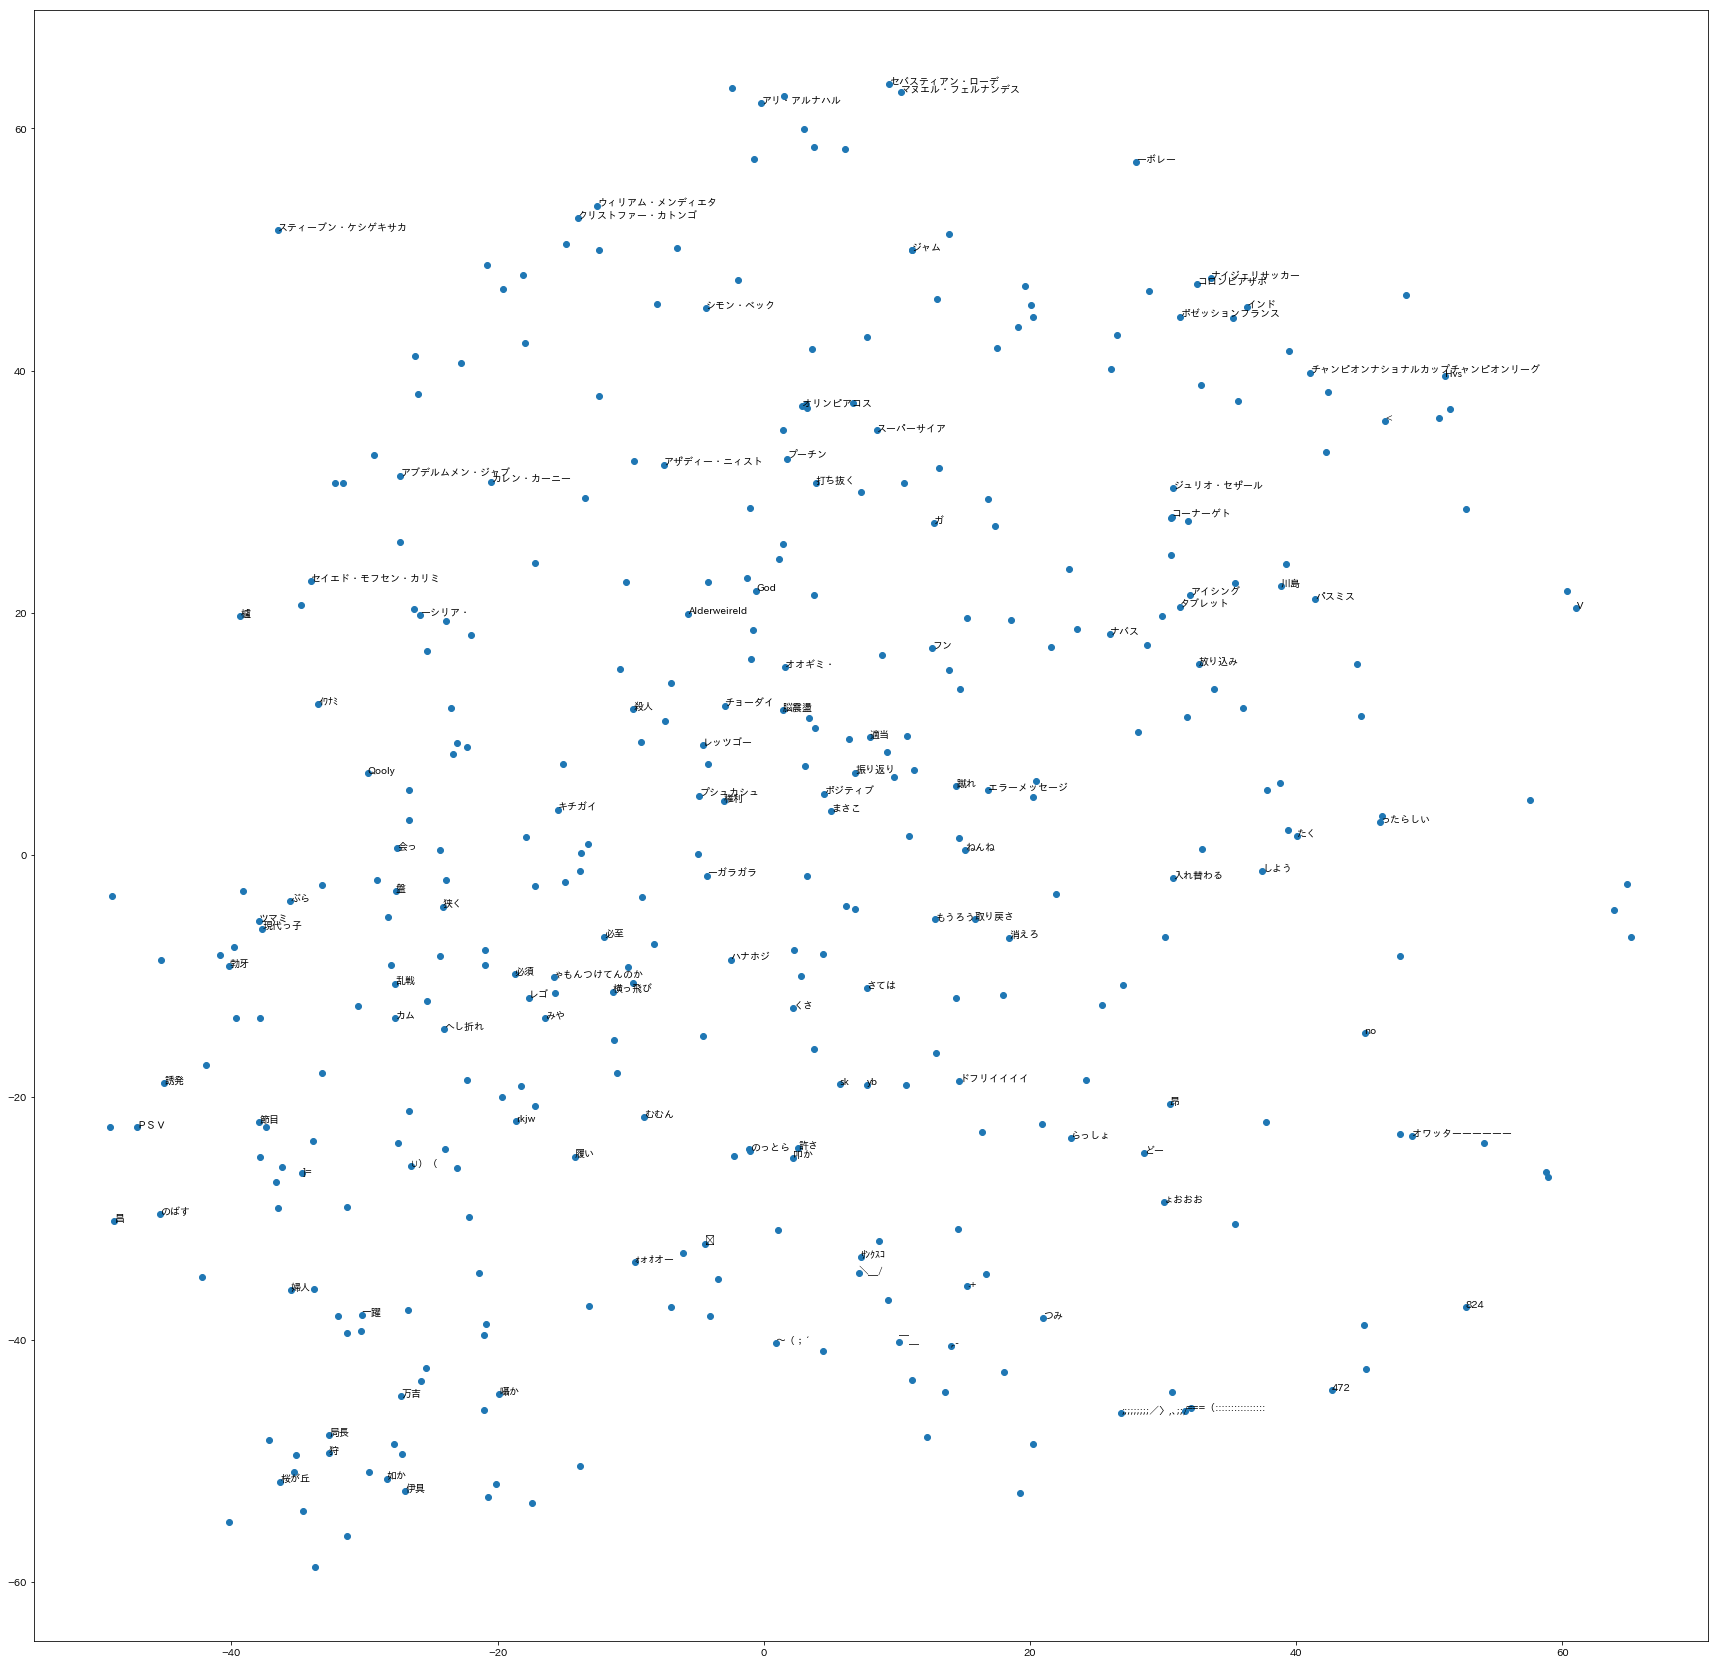

In [7]:
import matplotlib as mpl
from matplotlib.font_manager import FontProperties
#mpl.rcParams['font.family'] = 'AppleGothic'

#plt.rcParams['font.family'] = 'AppleGothic'
#font_path = '/usr/share/fonts/truetype/takao-gothic/TakaoPGothic.ttf'
#font_prop = FontProperties(fname=font_path)
#mpl.rcParams['font.family'] = font_prop.get_name()

fig, ax = plt.subplots(figsize=[30,30])
ax.scatter(res_2d[::100, 0], res_2d[::100, 1])
for word, x, y in zip(list(model.wv.vocab)[::300], res_2d[::300, 0], res_2d[::300, 1]):
    ax.annotate(word, (x,y))

In [74]:
model.wv.most_similar("キタ")

/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('キタァ', 0.974263608455658),
 ('キタッ', 0.9712108373641968),
 ('キタザワ', 0.96505206823349),
 ('ジシンキタ', 0.9498623609542847),
 ('ドウテンキタ', 0.9441677331924438),
 ('ァ', 0.9197967052459717),
 ('ウウ', 0.9185222387313843),
 ('アア', 0.9145909547805786),
 ('イマキタ', 0.9123387932777405),
 (';〈', 0.9109686613082886)]

In [79]:
model.wv.most_similar(positive=["日本", "国"])

/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('日本平', 0.9432467222213745),
 ('日本ハム', 0.9422600269317627),
 ('日本一', 0.9398524761199951),
 ('西日本', 0.9317530393600464),
 ('東日本', 0.9201017022132874),
 ('日本体育大学', 0.9138821363449097),
 ('ドローワールドカップ', 0.9035205841064453),
 ('ワールドカップウルグアイ', 0.9019733667373657),
 ('ークラブワールドカップ', 0.9000759720802307),
 ('アフリカ', 0.899178683757782)]

In [78]:
model.wv.most_similar("本田")

/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('よば', 0.9880120754241943),
 ('香川', 0.9581394791603088),
 ('岡崎', 0.8841283917427063),
 ('大久保', 0.8657387495040894),
 ('岡崎前', 0.860399067401886),
 ('ネイマ', 0.8512985110282898),
 ('柴崎', 0.8507445454597473),
 ('大迫', 0.844675600528717),
 ('宇佐美', 0.8413134217262268),
 ('長谷部', 0.838497519493103)]

In [87]:
model.wv.most_similar(positive=["日本", "サッカー"])

/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('サッカーシロウト', 0.9325523376464844),
 ('日本一', 0.9318423867225647),
 ('日本ハム', 0.9299184083938599),
 ('西日本', 0.927941620349884),
 ('日本平', 0.9259690046310425),
 ('東日本', 0.9256570935249329),
 ('サッポコ', 0.9208706617355347),
 ('ナイジェリサッカー', 0.9162102937698364),
 ('サッリ', 0.9144153594970703),
 ('サッカードットコム', 0.9120882153511047)]